In [120]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
conn = sqlite3.connect("DC34_de_Linux/DCbase.dcd")

In [19]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

          name
0    Batteries
1          ESC
2       Motors
3        MData
4    DriveSets
5         Gear
6        Props
7      Stators
8  Versioninfo


In [22]:
motor_table = pd.read_sql_query("SELECT * from Motors", conn)

In [23]:
print(motor_table)

      myid  tbs                                              Name  \
0        1    4                       137x50 11Y450 Kisscatz 9N6P   
1        2    4                      137x50 19Y300 Kisscatz 9N12P   
2        3    4                         179x49 16Y400 Staggerwing   
3        4    4                         180x61 9Y560 Micro-Pibros   
4        5    4                         190x130 7Y650 AC DYMOT-VL   
...    ...  ...                                               ...   
2140  2164    5               Turnigy Aerodrive SK3 - 3536-1200kv   
2141  2165    5                            Racestar BR3526 1200KV   
2142  2166    5                                  DYS D3542 1200kV   
2143  2167    5                      SUNNYSKY X2814 (3536) 1200KV   
2144  2168    5  C3542 1100KV 580W 2-4S Outrunner Brushless Motor   

                                                    Rem  custom  meas  match  \
0       6pol 5x1,5x1 N45 kaskadiert zu 5x6x1 0,5-Bleche       1     3      0   
1      12po

In [20]:
prop_table = pd.read_sql_query("SELECT * from Props", conn)

In [21]:
print(prop_table)

     myid  tbs           Name    Dia  Pitch          a         b  AltThr  \
0       1    4          APC E   4.10   4.10   0.502289  2.046544     200   
1       2    4  Grp. Miniprop   4.30   2.00   0.503854  2.000000      60   
2       3    4          APC E   4.50   4.10   0.671236  2.073493     200   
3       4    4    GrpCamSpeed   4.70   4.70   0.910000  2.000000      60   
4       5    4          APC E   4.75   4.75   0.710704  2.087590     200   
..    ...  ...            ...    ...    ...        ...       ...     ...   
580   589    5  Brotmesser V5  12.00  25.00  19.585730  2.065957       0   
581   590    5        AeroCam  12.00  13.00  23.855480  2.088905       0   
582   591    5   RFM CFK Flug  14.50  14.00   0.000000  0.000000       0   
583   592    5  RFM CFK Stand  14.50  14.00  32.307940  2.110557       0   
584   593    5  Aeronaut CAM   11.00  12.00  17.975250  2.060781       0   

     TmpThr        srcThr  ...  TmpPwr        srcPwr     n10N    n100W Folder  \
0     

In [24]:
conn.close()

### now we have the complete database in pandas

In [29]:
for col in prop_table.columns:
            print(col)

myid
tbs
Name
Dia
Pitch
a
b
AltThr
TmpThr
srcThr
c
d
AltPwr
TmpPwr
srcPwr
n10N
n100W
Folder
Hub
MaxRPM
match
Rely
ts


In [30]:
prop_table.keys

<bound method NDFrame.keys of      myid  tbs           Name    Dia  Pitch          a         b  AltThr  \
0       1    4          APC E   4.10   4.10   0.502289  2.046544     200   
1       2    4  Grp. Miniprop   4.30   2.00   0.503854  2.000000      60   
2       3    4          APC E   4.50   4.10   0.671236  2.073493     200   
3       4    4    GrpCamSpeed   4.70   4.70   0.910000  2.000000      60   
4       5    4          APC E   4.75   4.75   0.710704  2.087590     200   
..    ...  ...            ...    ...    ...        ...       ...     ...   
580   589    5  Brotmesser V5  12.00  25.00  19.585730  2.065957       0   
581   590    5        AeroCam  12.00  13.00  23.855480  2.088905       0   
582   591    5   RFM CFK Flug  14.50  14.00   0.000000  0.000000       0   
583   592    5  RFM CFK Stand  14.50  14.00  32.307940  2.110557       0   
584   593    5  Aeronaut CAM   11.00  12.00  17.975250  2.060781       0   

     TmpThr        srcThr  ...  TmpPwr        srcPwr     

In [33]:
selection = prop_table[prop_table['Dia'] == 11.0]
selection = selection[selection['Pitch'] < 5.0]

In [34]:
print(selection)

     myid  tbs          Name   Dia  Pitch         a         b  AltThr  TmpThr  \
87     89    4        APC SF  11.0    3.8  13.20801  2.245846     200    20.0   
88     90    4  Graupner CAM  11.0    4.0  13.76739  2.012500     120    18.0   
89     91    4        APC SF  11.0    4.7  16.11255  2.255838     200    20.0   
90     92    4        GWS RS  11.0    4.7  19.14273  2.163582      57    14.0   
470   479    4    iFlight CF  11.0    4.7  18.60433  2.116680     200    22.0   
540   549    4        APC MR  11.0    4.5  15.57772  2.117447     100    17.0   

           srcThr  ...  TmpPwr        srcPwr     n10N    n100W Folder   Hub  \
87        Dr Kiwi  ...    18.0      Hyperion  6926.30  6392.60      0   0.0   
88       Hyperion  ...    18.0      Hyperion  8491.95  7685.65      1  42.0   
89        Dr Kiwi  ...    15.0        Schenk  6288.00  6257.00      0   0.0   
90        Dr Kiwi  ...    14.0       Persson  6280.20  5908.40      0   0.0   
470  DC generated  ...    22.0  DC ge

In [36]:
my_prop = prop_table[prop_table['myid'] == 90]

In [37]:
my_prop

,myid,tbs,Name,Dia,Pitch,a,b,AltThr,TmpThr,srcThr,...,TmpPwr,srcPwr,n10N,n100W,Folder,Hub,MaxRPM,match,Rely,ts
88,90,4,Graupner CAM,11.0,4.0,13.76739,2.0125,120,18.0,Hyperion,...,18.0,Hyperion,8491.95,7685.65,1,42.0,0,0,7,2006-03-21 17:17:59


In [127]:
prop_table[(prop_table['n10N'] > 8000.0) & (prop_table['n10N'] < 8500.0)]

,myid,tbs,Name,Dia,Pitch,a,b,AltThr,TmpThr,srcThr,...,TmpPwr,srcPwr,n10N,n100W,Folder,Hub,MaxRPM,match,Rely,ts
54,56,4,GWS RS,9.0,7.0,11.832290,2.117133,200,20.0,Dr Kiwi,...,15.0,Schenk,8206.60,7075.90,0,0.0,6666,0,30,2010-03-08 16:01:59
55,57,4,GWS RS 3-Blade,9.0,7.0,13.824870,2.024323,200,20.0,Dr Kiwi,...,7.0,Persson 23.11.05,8369.30,6566.00,0,0.0,6666,0,30,2010-03-08 16:02:22
77,79,4,AeroCAM,10.0,8.0,9.579566,2.206408,0,15.0,DC generated,...,15.0,Aeronaut Diagram,8293.70,6601.40,1,42.0,16000,0,8,2010-03-09 19:52:30
88,90,4,Graupner CAM,11.0,4.0,13.767390,2.012500,120,18.0,Hyperion,...,18.0,Hyperion,8491.95,7685.65,1,42.0,0,0,7,2006-03-21 17:17:59
106,108,4,Graupner CAM,12.0,4.0,10.700950,2.169500,120,18.0,Hyperion,...,18.0,DC generated,8169.90,5703.60,1,42.0,0,0,1,2009-10-24 13:10:36
231,233,4,APC SF,9.0,6.0,10.021100,2.221310,200,20.0,Dr Kiwi,...,5.0,DC generated,8012.60,6539.60,0,0.0,7222,0,3,2010-03-08 16:00:16
305,311,4,Dymond E,10.0,6.0,12.905850,2.073536,0,15.0,DC generated,...,15.0,DC generated,8226.10,6659.60,0,0.0,0,0,3,2009-08-19 21:43:23
336,345,4,Graupner CAM,10.0,6.0,13.421750,2.032977,0,15.0,DC generated,...,15.0,,8415.50,7610.00,0,0.0,13500,0,1,2010-03-09 19:47:10
338,347,4,Graupner CAM,10.0,8.0,17.469150,1.947381,0,15.0,DC generated,...,15.0,,8071.70,6740.00,0,0.0,13500,0,1,2010-03-09 19:52:55
440,449,4,Master Airscrew 3BL,10.0,7.0,16.058900,1.942275,0,15.0,DC generated,...,15.0,DC generated,8475.60,6630.60,0,0.0,0,0,3,2013-10-30 18:08:24


In [108]:
class PropellerEmpirical():
    
    def __init__(self, table, index):
        """
        Select one prop by index from the database table
        """
        my_prop = table[table['myid'] == index]
        self.Name = my_prop['Name'].item()
        print(self.Name)
        self.D = float(my_prop['Dia'])
        self.H = float(my_prop['Pitch'])
        # self.a = float(my_prop['a'])
        self.b = float(my_prop['b'])
        # self.c = float(my_prop['c'])
        self.d = float(my_prop['d'])
        self.n10N = float(my_prop['n10N'])
        self.n100W = float(my_prop['n100W'])
        # it is not clear what values of a and c are in the database
        # we compute it from n10N and n100W instead
        self.a = 10.0 / pow(self.n10N,self.b)
        self.c = 100.0 / pow(self.n100W,self.d)

    
    def ShaftPower(self, rpm):
        """
        Compute the power [W] needed to spin the propeller with the requested
        revolutions per minute.
        """
        P = self.c * pow(rpm,self.d)
        return(P)

    def Thrust(self, rpm):
        """
        Compute the Thrust [N] generated by the propeller spinning with the requested
        revolutions per minute.
        """
        T = self.a * pow(rpm,self.b)
        return(T)


In [109]:
prop = PropellerEmpirical(prop_table, 90)

Graupner CAM


In [110]:
prop.n100W

7685.65

In [111]:
prop.c

1.587604352000625e-10

In [112]:
prop.d

3.0366

In [113]:
prop.ShaftPower(7685.65)

100.0

In [114]:
prop.n10N

8491.95

In [115]:
prop.a

1.2384330980321425e-07

In [116]:
prop.b

2.0125

In [118]:
prop.Thrust(8500)

10.019086781904813

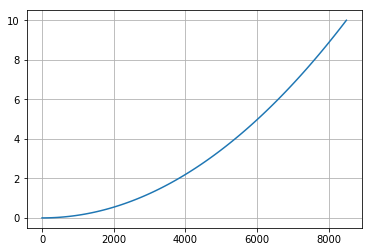

In [128]:
n = np.linspace(0,prop.n10N,100)
T = prop.Thrust(n)
plt.plot(n,T)
plt.grid()
plt.show()